#Ejercicio Unidad 1 Aprende y Mejora.
# Estudiante: Leonardo Torres Velilla

Tomaremos en cuenta el caso presentado por el profesor, realizando un analisis exploratorio de datos, donde se identificaran columnas, tipo de datos, medidas estadisticas, outliers, graficos.

In [97]:
"""Primero importamos las librerias necesarias para el analisis exploratorio de datos
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
"""
Importamos el dataset que para este ejercicio es un .CSV
"""
df_base = pd.read_csv("/content/credit_approval.csv", header=None)

#1. CREACIÓN DE NOMBRES A LAS COLUMNAS

In [99]:
df_base.columns = ['Sexo', 'Edad', 'Deuda', 'Casado', 'Cliente_bancario', 'Nivel_educativo',
    'Etnia', 'Años_empleo', 'Incumplimiento_previo', 'Empleado', 'Calificación_crediticia',
    'Licencia_conducir', 'Ciudadanía', 'Código_postal', 'Ingresos', 'Aprobado']

In [100]:
#Vizualizacion del dataset
df_base.head()

,Sexo,Edad,Deuda,Casado,Cliente_bancario,Nivel_educativo,Etnia,Años_empleo,Incumplimiento_previo,Empleado,Calificación_crediticia,Licencia_conducir,Ciudadanía,Código_postal,Ingresos,Aprobado
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [101]:
#Ver información del dataset
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     690 non-null    object 
 1   Edad                     690 non-null    object 
 2   Deuda                    690 non-null    float64
 3   Casado                   690 non-null    object 
 4   Cliente_bancario         690 non-null    object 
 5   Nivel_educativo          690 non-null    object 
 6   Etnia                    690 non-null    object 
 7   Años_empleo              690 non-null    float64
 8   Incumplimiento_previo    690 non-null    object 
 9   Empleado                 690 non-null    object 
 10  Calificación_crediticia  690 non-null    int64  
 11  Licencia_conducir        690 non-null    object 
 12  Ciudadanía               690 non-null    object 
 13  Código_postal            690 non-null    object 
 14  Ingresos                 6

In [102]:
#Resumen estadistico
df_base.describe(include='all')

,Sexo,Edad,Deuda,Casado,Cliente_bancario,Nivel_educativo,Etnia,Años_empleo,Incumplimiento_previo,Empleado,Calificación_crediticia,Licencia_conducir,Ciudadanía,Código_postal,Ingresos,Aprobado
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


Según como nos indica el diccionario de datos se cambiará la columna Aprobado a tipo numérico, reemplazando el "+" por "1" y el "-" por "0".

In [103]:
df_base['Aprobado'] = df_base['Aprobado'].replace({'+': 1, '-': 0}).astype(int)

/tmp/ipython-input-103-3247391404.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_base['Aprobado'] = df_base['Aprobado'].replace({'+': 1, '-': 0}).astype(int)


#2. ANALÍSIS DE LOS DATOS

Total de registros: 690
Total de columnas: 16

Tipos de datos
Numéricos: Edad, Deuda, Años_empleo, Calificación_crediticia, Ingresos.

Categóricos (object): Sexo, Casado, Cliente_bancario, etc.

Como punto importante a resaltar, la variable Edad aparece como (Object), esto debido a que contiene valores no numéricos como '?'


#3. LIMPIEZA INICIAL

  a. Tal como se ve en la descripcion de los valores en las columnas, se observa que hay valores en '?', motivo por el cual seran reemplazados por valores nulos.

  b. Convertir columnas numéricas a su tipo correcto.

  c. Identificar valores nulos.

  d. Eliminar duplicados nulos en caso de que existan.

In [104]:
#cambiar los '?' por NaN
df_base = df_base.replace('?', np.nan)
df_base.describe(include='all')


,Sexo,Edad,Deuda,Casado,Cliente_bancario,Nivel_educativo,Etnia,Años_empleo,Incumplimiento_previo,Empleado,Calificación_crediticia,Licencia_conducir,Ciudadanía,Código_postal,Ingresos,Aprobado
count,678,678,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677,690.000000,690.000000
unique,2,349,NaN,3,3,14,9,NaN,2,2,NaN,2,3,170,NaN,NaN
top,b,22.67,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,NaN
freq,468,9,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,NaN
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,0.444928
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,0.497318
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,0.000000
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,1.000000


In [105]:
#Conversion de variable Edad
df_base['Edad'] = pd.to_numeric(df_base['Edad'], errors='coerce')

#Verificar valores nulos y duplicados
print(df_base.isnull().sum())
print(df_base.duplicated().sum())

Sexo                       12
Edad                       12
Deuda                       0
Casado                      6
Cliente_bancario            6
Nivel_educativo             9
Etnia                       9
Años_empleo                 0
Incumplimiento_previo       0
Empleado                    0
Calificación_crediticia     0
Licencia_conducir           0
Ciudadanía                  0
Código_postal              13
Ingresos                    0
Aprobado                    0
dtype: int64
0


tal como observamos, las columnas que mas se ven afectadas son Sexo, Edad y Código_postal.

No se encontraron filas duplicadas.

#4. MANEJO DE VALORES FALTANTES.

En este paso tomaremos la variables de valores Numéricos que habíamos mencionado anteriormente y llenaremos los valores faltantes con la **media**. De igual manera las variables categóricas serán reemplazadas por la **moda**.

Luego volveremos a verificar si quedaron valores nulos.

In [106]:
#Valores numéricos con la media
col_num = ["Edad"]
for col in col_num:
    df_base[col].fillna(df_base[col].mean(), inplace=True)

/tmp/ipython-input-106-3592870640.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_base[col].fillna(df_base[col].mean(), inplace=True)


In [107]:
#Valores categóricas con la moda
col_cat = ["Sexo", "Casado", "Cliente_bancario", "Nivel_educativo", "Etnia", "Empleado", "Ciudadanía", "Código_postal"]
for col in col_cat:
    df_base[col].fillna(df_base[col].mode()[0], inplace=True)



/tmp/ipython-input-107-3290906951.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_base[col].fillna(df_base[col].mode()[0], inplace=True)


In [108]:
# Verificación que no queden nulos
print("\nValores nulos después de limpieza:")
print(df_base.isnull().sum())


Valores nulos después de limpieza:
Sexo                       0
Edad                       0
Deuda                      0
Casado                     0
Cliente_bancario           0
Nivel_educativo            0
Etnia                      0
Años_empleo                0
Incumplimiento_previo      0
Empleado                   0
Calificación_crediticia    0
Licencia_conducir          0
Ciudadanía                 0
Código_postal              0
Ingresos                   0
Aprobado                   0
dtype: int64


En conclusión podemos inferir que nuestra base ya no contiene valores nulos motivo por el cual podemos pasar a nuestro siguiente punto.

#5. ANALÍSIS DE ESTADÍSTICAS DESCRIPTTIVAS

- En este punto vamos a calcular la **media**, **mediana**, **desviasión estándar**, **mínimos**, **máximos**, **percentiles**.
- Distribución de variables numéricas.
- Detección y tratamiento de Outliers; en esta parte tomaremos la referencia indicada en la pagina del diccionario de datos, la cual será:

Si un outlier es extremo, lo eliminamos, para esto tomaremos como referencia (fuera de 3 desviaciones estándar), una regla de la estadística basada en la distribución normal; la regla a usar será la regla empírica del 68-95-99.7% para distribuciones normales y su uso para detección de valores atípicos.
 > Regla empirica para la distribución normal (2025, Abril 10).

Por consiguiente si no lo es será reemplazado por la media para los valores numéricos y con la moda para los categóricos.




In [109]:
# ANALISIS DESCRIPTIVOS

print(" Estadísticas descriptivas:\n")
print(df_base[["Edad", "Deuda", "Años_empleo", "Calificación_crediticia", "Ingresos"]].describe())

print("\n Medianas:\n")
print(df_base[["Edad", "Deuda", "Años_empleo", "Calificación_crediticia", "Ingresos"]].median())

print("\n Desviación estándar:\n")
print(df_base[["Edad", "Deuda", "Años_empleo", "Calificación_crediticia", "Ingresos"]].std())


 Estadísticas descriptivas:

             Edad       Deuda  Años_empleo  Calificación_crediticia  \
count  690.000000  690.000000   690.000000                690.00000   
mean    31.568171    4.758725     2.223406                  2.40000   
std     11.853273    4.978163     3.346513                  4.86294   
min     13.750000    0.000000     0.000000                  0.00000   
25%     22.670000    1.000000     0.165000                  0.00000   
50%     28.625000    2.750000     1.000000                  0.00000   
75%     37.707500    7.207500     2.625000                  3.00000   
max     80.250000   28.000000    28.500000                 67.00000   

            Ingresos  
count     690.000000  
mean     1017.385507  
std      5210.102598  
min         0.000000  
25%         0.000000  
50%         5.000000  
75%       395.500000  
max    100000.000000  

 Medianas:

Edad                       28.625
Deuda                       2.750
Años_empleo                 1.000
Calificac

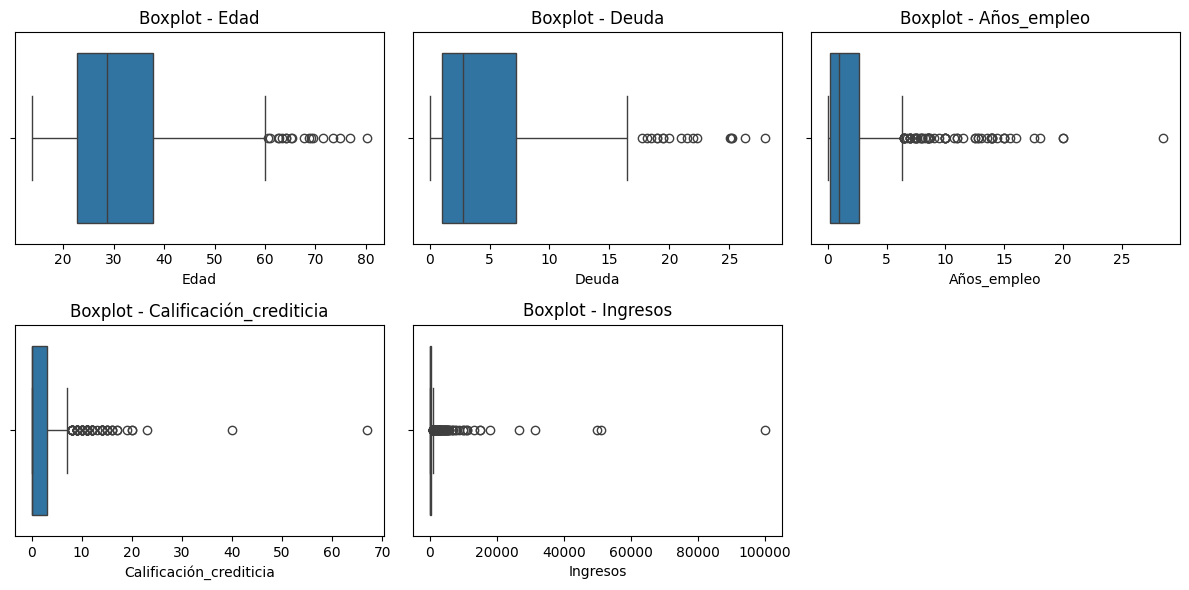

In [112]:
# Gráfico de cajas para vizualizar los Outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(["Edad", "Deuda", "Años_empleo", "Calificación_crediticia", "Ingresos"]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_base[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

Podemos analizar según el resultado de los gráficos que todas las variables presentan outliers; sus distribuciones son asimétricas.

#Tratamiento para Outliers Numéricos



In [113]:

def tratar_outliers(df_base, columnas):
    for col in columnas:
        media = df_base[col].mean()
        std = df_base[col].std()

        lim_inf = media - 3 * std
        lim_sup = media + 3 * std

        extremos = df_base[(df_base[col] < lim_inf) | (df_base[col] > lim_sup)]
        df_base[col] = df_base[col].apply(lambda x: media if x < lim_inf or x > lim_sup else x)
        print(f"Outliers tratados en '{col}': {len(extremos)}")
    return df_base

# Aplicar la función a las variables numéricas
df_base = tratar_outliers(df_base, ["Edad", "Deuda", "Años_empleo", "Calificación_crediticia", "Ingresos"])


Outliers tratados en 'Edad': 9
Outliers tratados en 'Deuda': 10
Outliers tratados en 'Años_empleo': 22
Outliers tratados en 'Calificación_crediticia': 8
Outliers tratados en 'Ingresos': 6


  Definimos un método para reemplazar o eliminar los outliers numéricos, teniendo en cuenta la regla empirica para la distribución normal, comentada arriba anteriormente.
  
  La función calcula la media y la desviasión estandar. Se crearon 2 variables las cuales son las encargadas de establecer nuestro límite inferior (-3), como nuestro límite superior (+3), luego identificamos los valores extremos de la columna y los guardamos para contarlos e informar cuántos se reemplazarán.

  La función **lambda**, para este caso se definió que para cada valor **x** en la columna, Si **x** es menor que el límite inferior o mayor que el límite superior (outlier extremo), este reemplaza **x** por la media; Si no, deja a **x** sin cambios.

  Para finalmente aplicar esta función a toda la columna con **apply()**.
  Como resultado tenemos la cantidad de Outliers tratados por columna.

#Tratamiento Para Outliers Categóricos

In [114]:
for col in col_cat:
    moda = df_base[col].mode()[0]
    freqs = df_base[col].value_counts()
    categorias_raras = freqs[freqs < 0.01 * len(df_base)].index
    df_base[col] = df_base[col].apply(lambda x: moda if x in categorias_raras else x)
    if len(categorias_raras) > 0:
      print(f"Categorías poco frecuentes reemplazadas en '{col}': {list(categorias_raras)}")


Categorías poco frecuentes reemplazadas en 'Casado': ['l']
Categorías poco frecuentes reemplazadas en 'Cliente_bancario': ['gg']
Categorías poco frecuentes reemplazadas en 'Nivel_educativo': ['r']
Categorías poco frecuentes reemplazadas en 'Etnia': ['dd', 'n', 'o']
Categorías poco frecuentes reemplazadas en 'Código_postal': ['00380', '00440', '00040', '00144', '00132', '00520', '00070', '00420', '00108', '00232', '00176', '00272', '00150', '00181', '00460', '00480', '00096', '00128', '00216', '00164', '00290', '00500', '00168', '00145', '00210', '00312', '00252', '00560', '00130', '00330', '00225', '00092', '00720', '00110', '00352', '00050', '00370', '00112', '00350', '00399', '00396', '00020', '00129', '00154', '00136', '00228', '00088', '00073', '00455', '00491', '00030', '00583', '00434', '00202', '00043', '00052', '00094', '00443', '00980', '00515', '00250', '00311', '00239', '00711', '00408', '00075', '00152', '00329', '00212', '00410', '00274', '00510', '00431', '00102', '00029'

Para tratar estos outliers utilicé un ciclo **for** teniendo en cuenta que ya se tenía una variable anteriormente llamada **col_cat** y reemplaza las categorías poco frecuentes por la **moda** de cada columna. Se creó variable **freqs** para contar la frecuencia de cada categoría en la columna. Se definen como **(categorias_raras)** todas aquellas cuya frecuencia representa menos del 1% del total de registros.

Nuevamente usé la función **lambda** para cada valor **x** de la columna, indicandole que si **x** pertenece a las **categorias_raras**, lo reemplaza por la **moda**; si no, deja el valor **x** tal como está.

Para finalmente con **len** indicarle que si encuentra una categoría rara indique cual fue y que columna se reemplazó.

#6. GRÁFICOS Y ANALISIS

En este apartado se realizarán gráficos exploratorios para tener un analísis más formal y ayudar en la toma de desiciones ante alguna problemática con respecto a estos datos.

Text(0.5, 1.0, 'Distribución de Edad')

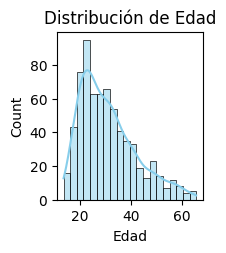

In [117]:
# Gráfico 1: Histograma de Edad
plt.subplot(2, 3, 1)
sns.histplot(df_base['Edad'], kde=True, bins=20, color='skyblue')
plt.title("Distribución de Edad")

Este gráfico nos muestra la istribución por edad de la base, la cual se ve ligeramente sesgada hacía la derecha, indicando una distribución unimodal, y concluyendo que la mayoría de los solicitantes se encuentran entre los 20 y 40 años.

Text(0.5, 1.0, 'Edad vs Ingresos según Aprobación')

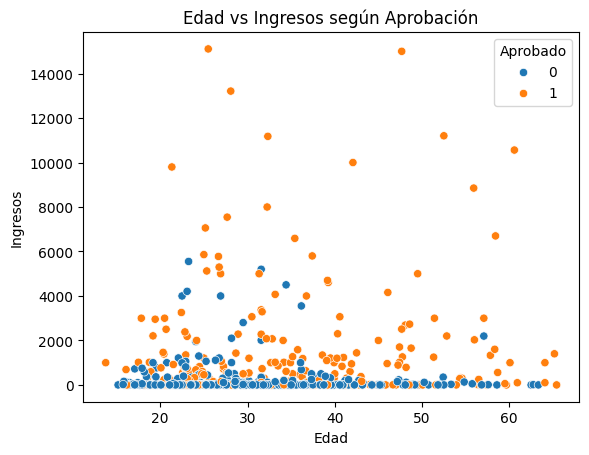

In [125]:
# Gráfico 2: Scatterplot Edad vs Ingresos (coloreado por aprobación)

sns.scatterplot(x='Edad', y='Ingresos', hue='Aprobado', data=df_base)
plt.title("Edad vs Ingresos según Aprobación")

Para este gráfico se está comparando la edad vs los ingresos por aprobación, evidenciando que los ingresos altos se aprueban más, de la misma manera que no hay muchas aprobaciones con ingresos cercanos a cero.

Podemos concluir que entre estas dos variables hay una gran relación entre ingresos y la probabilidad de aprobación.

/tmp/ipython-input-126-1222699859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Aprobado', data=df_base, palette='pastel')


Text(0.5, 1.0, 'Frecuencia de Aprobación')

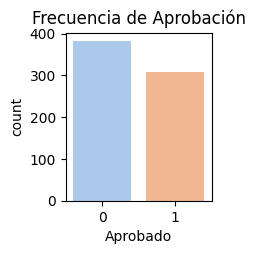

In [126]:
# Gráfico 3: Countplot de Aprobación
plt.subplot(2, 3, 4)
sns.countplot(x='Aprobado', data=df_base, palette='pastel')
plt.title("Frecuencia de Aprobación")

En este gráfico se busco saber la frecuencia en la que se aprueban los créditos, dando como resultado que más solicitudes son rechazadas que aprobadas.

Concluyendo que el sistema de crédito es exigente o el perfil general es riesgoso.

/tmp/ipython-input-127-1588169263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sexo', y='Edad', data=df_base, palette='cool')


Text(0.5, 1.0, 'Edad por Sexo')

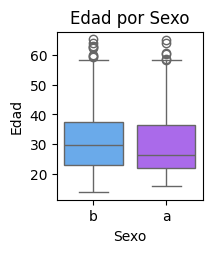

In [127]:
# Gráfico 4: Boxplot Edad según Sexo
plt.subplot(2, 3, 5)
sns.boxplot(x='Sexo', y='Edad', data=df_base, palette='cool')
plt.title("Edad por Sexo")

En este gráfico se buscó comparar variables categóricas (Sexo) con numéricas (Edad), dando como resultado que tanto hombres (b), como mujeres (a) tienen distribuciones de edades similares. Por lo que se puede concluir que no hay diferencias significativas por sexo en cuanto a edad.

Text(0.5, 1.0, 'Correlación entre variables numéricas')

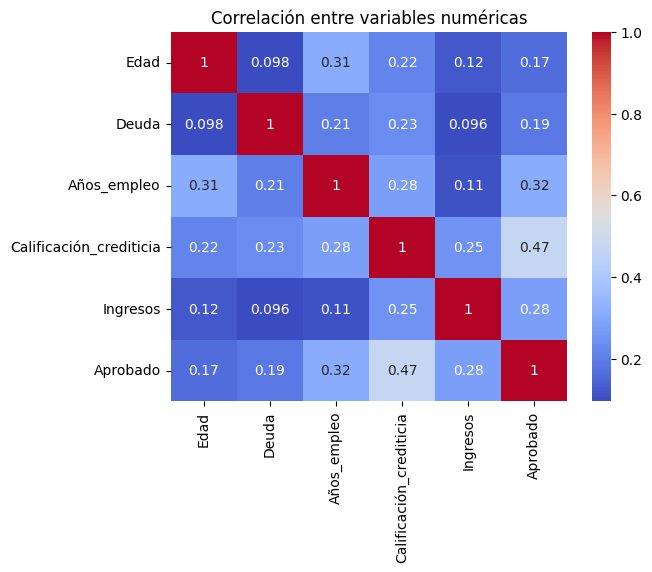

In [130]:
# Gráfico 6: Heatmap de Correlaciones
sns.heatmap(df_base.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlación entre variables numéricas")

Para finalizar se realizó un mapa de correlación entre las variables numéricas del conjunto de datos. Se observa que todos los valores se encuentran positivos y van de 0.096 a 1, lo cual sugiere que no hay relaciones negativas entre las variables numéricas.

De este grafico se puede concluir diferentes aspectos como:
- La calificación crediticia es el predictor más fuerte del resultado (Aprobado), lo cual es coherente con prácticas estándar de análisis crediticio.
- Años de empleo e ingresos también influyen positivamente en la aprobación del crédito, aunque con menor intensidad.
- Variables como edad y deuda tienen correlaciones bajas, por lo que podrían no ser tan determinantes.
- Todas las correlaciones están por debajo de (0.5), lo que es positivo para futuros modelos predictivos.

#BIBLIOGRAFIAS

1. Regla empirica para la distribución normal. *https://builtin.com/data-science/empirical-rule*

2. Diccionario de datos. *https://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html*

3. Función Lambda. *https://www.datacamp.com/es/tutorial/python-lambda-functions#:~:text=Las%20funciones%20lambda%20de%20Python%20son%20una%20potente%20herramienta%20para,consulta%20los%20recursos%20de%20DataCamp.*
